## 1. Load libraries and data postprocessing

In [10]:
import warnings
import pickle
import torch
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats
from collections import defaultdict

## 2. Figures contained in the paper

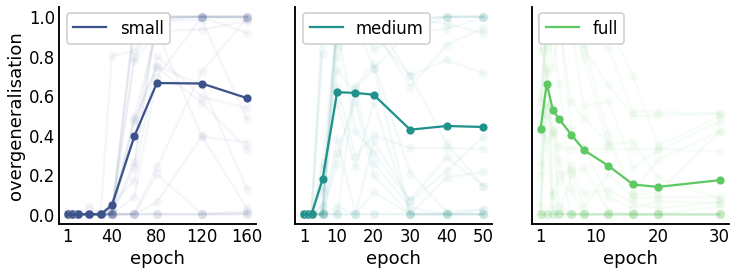

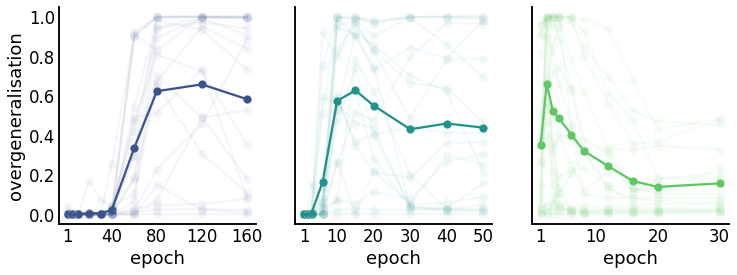

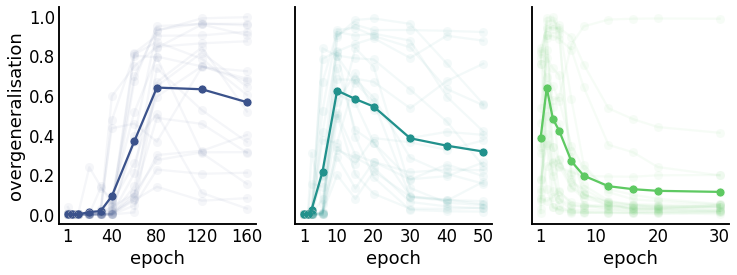

In [6]:
results = pickle.load(open("results.pickle", "rb"))
sns.set_context("talk")
warnings.simplefilter("ignore")

data = defaultdict(lambda: defaultdict(lambda: dict()))

for data_type in ["synthetic", "semi_natural", "natural"]:
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
    colours = sns.color_palette("viridis", 3)
    (ax1, ax2, ax3) = axes

    for i, (size, ax) in enumerate(zip(["tiny", "small", "all"], axes)):
        across_idioms = []
        for j in range(20):
            per_idiom = []
            for seed in range(1, 6):
                all_x, all_y1 = results[(size, seed, data_type)]
                per_idiom.append(all_y1[j])
            across_idioms.append(np.nanmean(np.matrix(per_idiom), axis=0).tolist()[0])
            data[data_type][size][j] = np.nanmean(np.matrix(per_idiom), axis=0).tolist()[0]

        ax.tick_params(axis=u'both', which=u'both',length=0)
        sns.scatterplot(x=all_x[0], y=np.nanmean(np.matrix(across_idioms), axis=0).tolist()[0], color=colours[i], alpha=1, ax=ax)
        sns.lineplot(x=all_x[0], y=np.matrix(across_idioms).mean(axis=0).tolist()[0], color=colours[i], alpha=1, ax=ax,
                     label={"tiny": "small", "small": "medium", "all": "full"}[size])

        for y in across_idioms:
            sns.scatterplot(x=all_x[0], y=y, color=colours[i], alpha=0.05, ax=ax)
            sns.lineplot(x=all_x[0], y=y, color=colours[i], alpha=0.05, ax=ax)

        ax.set_xlabel("epoch")
        if size == "tiny":
            ax.set_xticks([1, 40, 80, 120, 160])
        elif size == "small":
            ax.set_xticks([1, 10, 20, 30, 40, 50])
        else:
            ax.set_xticks([1, 10, 20, 30])

        ax.set_ylabel("overgeneralisation")
        sns.despine(top=True, right=True)

        if data_type == "synthetic":
            ax.legend([{"tiny": "small", "small": "medium", "all": "full"}[size]], loc=(0.04, 0.83), framealpha=1)
        else:
            ax.legend([], [], frameon=False)

        plt.savefig(f"figures/{data_type}.pdf", bbox_inches="tight")
    plt.show()

## 3. Figure that's on the poster

In [ ]:
results = pickle.load(open("results.pickle", "rb"))
sns.set_context("talk")
warnings.simplefilter("ignore")


data_type = "natural"
fig = plt.figure(figsize=(10, 4))
colours = sns.color_palette("viridis", 3)
size = "small"

across_idioms = []
for j in range(20):
    per_idiom = []
    for seed in range(1, 6):
        all_x, all_y = results[(size, seed, data_type)]
        per_idiom.append(all_y[j])
    across_idioms.append(np.nanmean(np.matrix(per_idiom), axis=0).tolist()[0])

ax = sns.scatterplot(x=all_x[0], y=np.nanmean(np.matrix(across_idioms), axis=0).tolist()[0], color=colours[0], alpha=1)
ax = sns.lineplot(x=all_x[0], y=np.matrix(across_idioms).mean(axis=0).tolist()[0], color=colours[0], alpha=1,
                  label={"tiny": "small", "small": "medium", "all": "full"}[size])
           
for y in across_idioms:
    sns.scatterplot(x=all_x[0], y=y, color=colours[0], alpha=0.05, ax=ax)
    sns.lineplot(x=all_x[0], y=y, color=colours[0], alpha=0.05, ax=ax)

ax.set_xlabel("epoch")
ax.set_xticks([10, 20, 30, 40, 50])
ax.set_ylabel("overgeneralisation")
sns.despine(top=True, right=True)
ax.legend([], [], frameon=False)
plt.show()

## 4. Table for appendix

In [9]:
for evaluation_data in ["synthetic", "semi_natural", "natural"]:
    peak_tiny = " & ".join([str(round(max(data[evaluation_data]["tiny"][i]), 2)) for i in range(20)])
    peak_small = " & ".join([str(round(max(data[evaluation_data]["small"][i]), 2)) for i in range(20)])
    peak_full = " & ".join([str(round(max(data[evaluation_data]["all"][i]), 2)) for i in range(20)])
    print(f"{evaluation_data} & small & {peak_tiny.replace('0.', '.')} \\\\")
    print(f" & medium & {peak_small.replace('0.', '.')} \\\\")
    print(f" & full & {peak_full.replace('0.', '.')} \\\\")

synthetic & small & .98 & .92 & .98 & 1.0 & .4 & .75 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & .01 & 1.0 & .0 & .0 & .99 & 1.0 & .8 & .2 & .74 \\
 & medium & .99 & .96 & .98 & 1.0 & .76 & .73 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & .22 & 1.0 & .0 & .0 & 1.0 & .57 & .65 & .38 & .57 \\
 & full & .97 & .86 & .97 & 1.0 & .5 & .56 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & .24 & 1.0 & .0 & .0 & 1.0 & .74 & .55 & .24 & .44 \\
semi_natural & small & .95 & .66 & .98 & 1.0 & .49 & .73 & 1.0 & 1.0 & 1.0 & .97 & 1.0 & .08 & 1.0 & .03 & .0 & .88 & .99 & .7 & .15 & .81 \\
 & medium & .91 & .6 & .95 & 1.0 & .78 & .63 & .96 & 1.0 & 1.0 & .97 & 1.0 & .31 & .99 & .03 & .0 & .97 & .74 & .59 & .3 & .59 \\
 & full & .97 & .55 & .95 & 1.0 & .4 & .68 & .99 & 1.0 & 1.0 & .99 & 1.0 & .31 & 1.0 & .03 & .0 & .97 & .9 & .56 & .23 & .47 \\
natural & small & .8 & .51 & .8 & .97 & .84 & .31 & .75 & .96 & .92 & .82 & .88 & .14 & .74 & .75 & 1.0 & .4 & .96 & .49 & .23 & .87 \\
 & medium & .8 & .5 & .82 & .96 & .84 & .32 & .71 & .94 & .92 & .68 &